### task1

In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://stepik.org/media/attachments/lesson/779914/make_it_easy.csv'
df = pd.read_csv(path)

In [9]:
df.sample(2)

,feature_1,feature_2,feature_3,label
662,1.89,0.65,35,A
820,-0.67,1.89,36,A


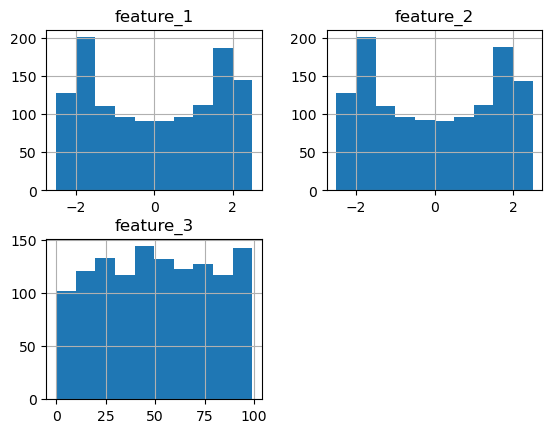

In [7]:
df.hist();

In [8]:
corr = df.corr(numeric_only=True).round(2)
corr.style.background_gradient(cmap='RdYlGn')

,feature_1,feature_2,feature_3
feature_1,1.000000,-0.000000,-0.020000
feature_2,-0.000000,1.000000,0.010000
feature_3,-0.020000,0.010000,1.000000


In [84]:
df["killer_feature"] = ((df['feature_1']**2 + df['feature_2']**2) **0.5).round(2)
df["killer_feat"] = df["r_2"] < 2.25

In [92]:
df[~df.killer_feat].label.unique()

array(['B'], dtype=object)

In [91]:
df[df.killer_feat].label.unique()

array(['A'], dtype=object)

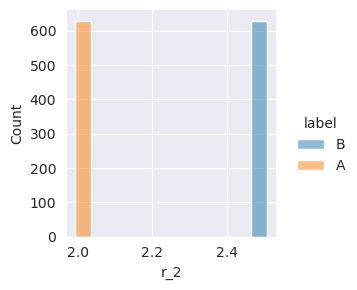

In [79]:
sns.displot(
    data=df,
    x='r_2',
    hue='label',
    aspect=1,
    height=3
);

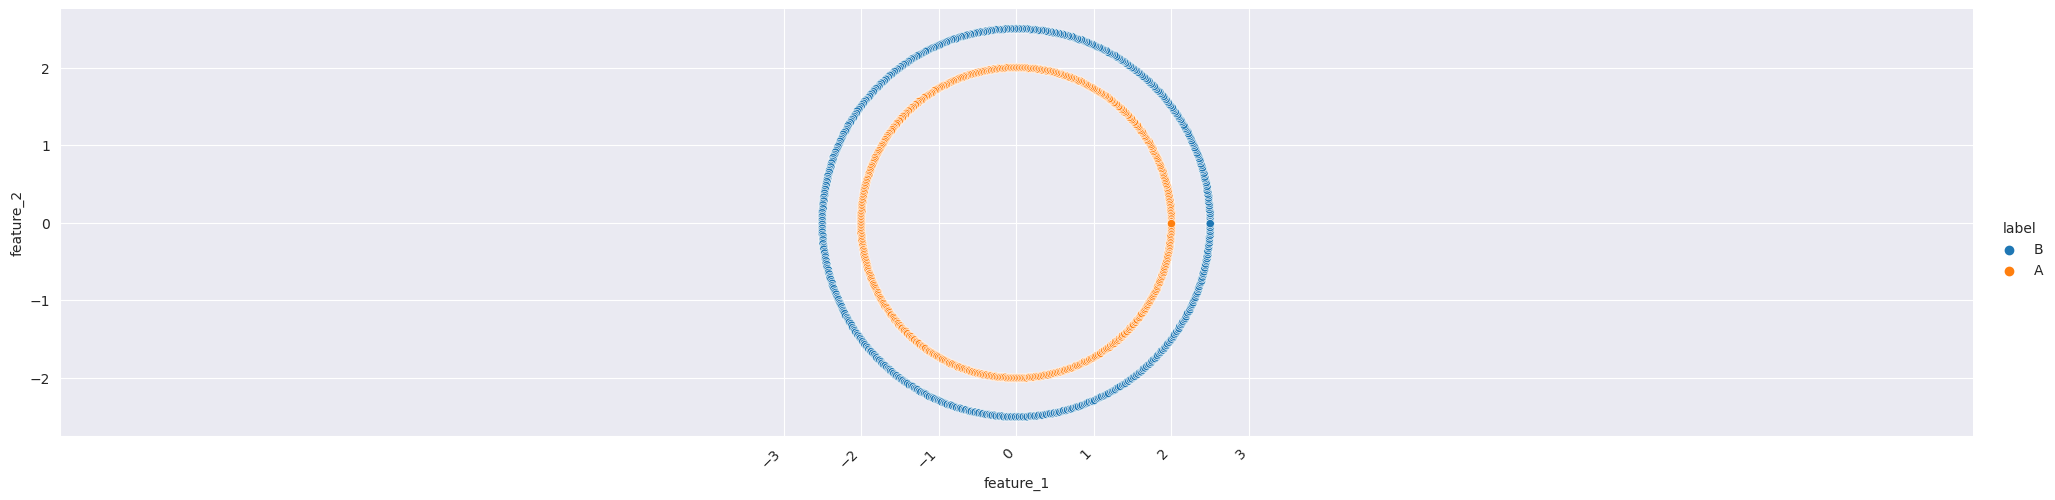

In [81]:
sns.set_style("darkgrid")
g = sns.relplot(
    data=df,
    x='feature_1',
    y='feature_2',
    kind='scatter',
    hue='label',
    aspect=4,
    
)
plt.axis('equal')

g.set_xticklabels(rotation=45, horizontalalignment="right", step=1);

### task 2

In [93]:
path = 'https://stepik.org/media/attachments/lesson/779914/make_gold_features_example.csv'
df = pd.read_csv(path)

In [191]:
df = df.sort_values('ride_date')
df['day'] = -1
for idx in df.car_id.unique():
    n = df[df.car_id == idx].shape[0]
    df.loc[df.car_id == idx, 'day'] = range(n)

df['deviation_avg'] = df.groupby(['car_id', 'ride_date'])['deviation_normal'].transform('mean')
df = df.drop_duplicates(['car_id', 'ride_date'])

feat1_df = df.groupby('car_id')['deviation_normal'].agg(
    lambda x: (x - x.shift(1)).max() if (x - x.shift(1)).max() > 5 else 0
).rename('gold_feature_1').reset_index()

def find_shift_day(x):
    shift_idx = (x['deviation_avg'] - x['deviation_avg'].shift(1)).idxmax()
    shift = (x['deviation_avg'] - x['deviation_avg'].shift(1)).max()
    if shift < 5:
        return 0
    return x.loc[shift_idx]['day']

feat2 = df.groupby('car_id').apply(find_shift_day).rename('gold_feature_2')
result = feat1_df.merge(feat2, on='car_id')